# <font color="black">**Supervised Machine learning**</font> 
We begin our journey into the machine learning and deep learning world by starting with simple algorithms like **linear regression**.

<font color="green">**Table of contents**</font> 
1. Population vs sample
2. Machine learning
3. Linear regression
4. Data scaling, standardization and normalization
5. Overfitting and generalization


### <font color="green">**Population vs Sample**</font> 


---


A <font color="green">**population**</font>  is the entire group for which you want to draw a conclusion from or study. However, it is always impossible to have the full population and we always have just a <font color="green">**sample**</font>  from the population. When we train our model on a sample we want to obtain a model that will work well on the entire population, we want a model that can generalize to the population. 

### <font color="green">**What is machine learning ?**</font>
---


Machine learning is the study of computer algorithms that allow computer programs to automatically improve through experience. A computer program is giving <font color="green">**data**</font> , it learns from these data and improves its <font color="green">**performance**</font>  as it gains <font color="green">**experience**</font>  from the data. Machine learning is divided into several parts. Two of these parts which are very popular are <font color="green">**supervised**</font>  and <font color="green">**unsupervised**</font>  machine learning. The difference is in supervised machine learning we provide we provide our model with both <font color="green">**data**</font> and <font color="green">**labels**</font> . In unsupervised machine learning we give our model only data.
Example of supervised learning include <font color="green">**classification**</font>  and <font color="green">**regression**</font> .
Examples of unsupervised learning include <font color="green">**clustering**</font> and <font color="green">**dimensionality reduction**</font> .

In [80]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.width=0

Let us begin with regression using the carlifonia dataset. <font color="green">**Pandas**</font>  is one of python's most powerful libraries, it makes data manipulation smooth and nice. <font color="green">**Numpy**</font>  or numeric python is a backbone in python mathematical computing. <font color="green">**Scikit-learn (sklearn)**</font> is a machine learning library with implementations for several algorithms.

## <font color="black">**Supervised ML**</font> 
### <font color="black">**Linear Regression**</font> 


---


Linear regression is a method to model the relationship between one response variable <font color="green">**(y)**</font> and one or more explanatory variables <font color="green">**(x)**</font> . When we have one explanatory variable it is called a <font color="green">**simple regression**</font>  and when we have more than one explanatory variables it is called <font color="green">**multi linear regression**</font>  Given <font color="green">y = **b1**x + **b0**</font>, we want to find the appropriate                    <font color="green">**b1**</font> and <font color="green">**b0**</font> values such that with any **x** we can predict **y**. We will build a multiple linear regression model below. If you want to build a simple linear regression model, just reduce the number of variables selected to one. Note however, that some response variables (y) can not be explained well by just a single explanatory variable (x). If you change the number of variables selected below, you will observe the R-squared score changing too. Below is an example of a simple regression model showing the regression line drawn through data points.



In [81]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size'] = 5.0
carl_data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
carl_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We can use <font color="green">**pearson's correalation**</font> to see the correlation between variables in the data. Below we get the correlation matrix with pandas and the visualize it in a well coloured table. Red indicates a very high correlation while blue indicate very low correlation. Looking at that we can select some variables with high correlation with <font color="green">**median_house_value**</font> and perform linear regression.

In [82]:
corr = carl_data.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-82-c64fbc9ab882>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = carl_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [83]:
sel_variables = carl_data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'latitude']]
sel_variables.describe()

,median_house_value,median_income,total_rooms,housing_median_age,latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,2635.763081,28.639486,35.631861
std,115395.615874,1.899822,2181.615252,12.585558,2.135952
min,14999.000000,0.499900,2.000000,1.000000,32.540000
25%,119600.000000,2.563400,1447.750000,18.000000,33.930000
50%,179700.000000,3.534800,2127.000000,29.000000,34.260000
75%,264725.000000,4.743250,3148.000000,37.000000,37.710000
max,500001.000000,15.000100,39320.000000,52.000000,41.950000


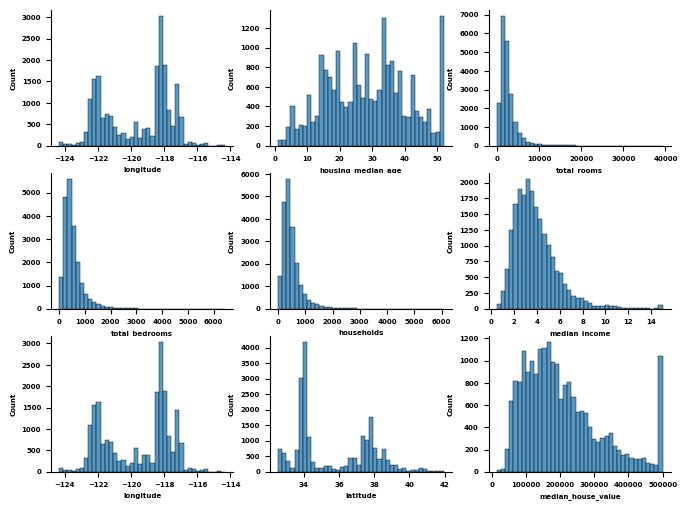

In [84]:
# Let us look at the distribution of some interger variables

columns = ['longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms','households', 'median_income','longitude',
        'latitude','median_house_value']
def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8, 6))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.histplot(carl_data[columns[index]], ax=ax[i][j], bins=40)
            sns.despine()
            index+=1

        
distplot(3, 3, columns)

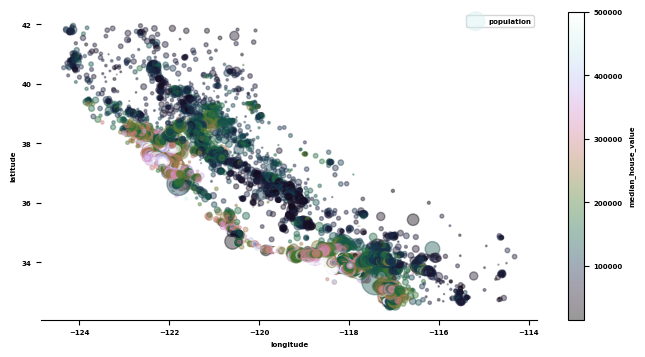

In [85]:

carl_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='population',
            figsize=(8,4),c='median_house_value',s=carl_data['population']/100, cmap=plt.get_cmap('cubehelix') ,colorbar=True)
              
plt.legend()

### <font color="black">**Data scaling**</font>


---



It is very popular to see people rescale their data in machine learning. Every variable has values in different ranges. For example, median_house_values are in the hundreds of thousand scale, total rooms is in the tens of thousands. Feature scaling helps to improve performances of machine learning algorithms. Read [this](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) to give you some more reason why it is important.

### <font color="black">**Standardization**</font>


---


To standardize data, we subtract the **mean** and divide by the **standard deviation**. In statistical term we say we are zero centering the data and scaling to unit variance. What we have at the end are values called **z-scores**.

### <font color="black">**MinMax normalization**</font>


---


This is another scaling method which rearranges the values such that the fall between 0 and 1. The easiest way to normalize a vector of values is to divide all values by the maximum value.

In [86]:
scaler = StandardScaler()
x = scaler.fit_transform(sel_variables[['median_income', 'total_rooms', 'housing_median_age', 'latitude']])
y = sel_variables['median_house_value'].values
print(x[0:3, :])


[[ 2.34476576 -0.8048191   0.98214266  1.05254828]
 [ 2.33223796  2.0458901  -0.60701891  1.04318455]
 [ 1.7826994  -0.53574589  1.85618152  1.03850269]]


Next we build our **linear regression model**, which is quite easy to do thanks to **scikit-learn**. First of all we will split our data into a <font color="green">**training**</font> and <font color="green">**test**</font> set. This is a very important concept in the field of machine learning. We always fit/train our models to the training data and the use the test data to validate it. We do this because we want to test our data on new data it has never seen before. This will helps us assess how good our model really is. Another important reason for this is <font color="green">**overfitting**</font>. 
### <font color="black">**Overfitting**</font>


---


Overfitting is a situation in which our model works well on the training set but performs poorly on new data. Think of this like our model has memorized our training data and will work well on it but poorly on the test data. 

### <font color="black">**Generalization**</font>


---


One of the main aims of building models in machine learning is so that we can deploy them into the world and use them for predictions. When a model works well on our training set and on the test set, there is a high possibility of it working well in the real world. A model that works well in the real world is said to <font color="green">**generalize**</font> well. 


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
LR_clf = LinearRegression()
LR_clf.fit(x_train, y_train)

print('Score on training set: {}'.format(LR_clf.score(x_train, y_train)))
print('Score on test set: {}'.format(LR_clf.score(x_test, y_test)))

Score on training set: 0.5230352569911008
Score on test set: 0.5150982352008113


As seen above the model has a higher <font color="green">**R-squared**</font> value on the training than test set. The model is slightly overfitting but this is not that bad. It would have been worse if the **R-squared** differed say by atleats 0.10.
We used R-squared as our performance measure, but there are several other performance measures, like the <font color="green">**mean squared error**</font>, <font color="green">**mean absolute error**</font>. When we started our journey in linear regression, we said our target was to estimate <font color="green">**coefficients**</font> and an <font color="green">**intercept**</font> for our linear equation y = **b1**x + **b0**. Below we will see how to get these estimated coefficients. The number of coefficients will be equal to the number of variables we used in our model. The best R-squared value is 1. we are having 0.51 at the moment.

In [88]:
print('Coefficients: {}, intercept: {}'.format(LR_clf.coef_, LR_clf.intercept_))  

Coefficients: [ 79921.23412838   8237.31624935  25255.87734759 -10197.21341923], intercept: 206818.7299248791


Now that we have our model and estimates of the coefficients and intercept, we can predict the median house value by simply calling the predict function on our model and passing it our new data.

In [89]:
predictions = LR_clf.predict(x_test)
print(predictions)

[217543.47590578 260463.00286916 138248.12080587 ... 139389.36095269
 200291.49221937  97979.31690328]


### <font color="green">**Your turn !!!**</font> 

Why don't you try it out and see if you can beat my R-squared score. Practice makes perfect. **Go ahead!!!**

### <font color="green">**Hint**</font>
Maybe if you add some new variables the R-squared may increase.

<font color="green">**Cheers**</font>